<a href="https://colab.research.google.com/github/david-garza/final_project/blob/bianca/exploratory_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quick Analysis of CSV Data from BEACON and National Weather Service

## Beach Attributes File

In [10]:
# Load pandas module
import pandas as pd

In [11]:
# Read beach_attributes from local gdrive location, MUST BE CHANGED TO MATCH YOUR FILE LOCATION!!!
#beach_attr_df = pd.read_csv("/content/drive/MyDrive/Project/Data/Beach/Beach_Attributes.csv")

# Read local file.
from google.colab import files
upload = files.upload()

Saving Beach_Attributes.csv to Beach_Attributes (2).csv


In [61]:
# Import and read the "Beach_Attributes.csv".
import pandas as pd 
beach_attr_df = pd.read_csv("Beach_Attributes.csv")
pd.set_option('max_columns', None)
beach_attr_df

,State,Year,Beach ID,Beach Name,County,Beach Ownership/Beach Accessibility,BeachLength (Mi),Tier,Start Latitude,Start Longitude,End Latitude,End Longitude,Waterbody Name,Waterbody Type,AdvisoryReportingFrequency(to EPA),AdvisoryReportingFrequencyUnits
0,TX,2022,TX710697,25th St.,GALVESTON,Public/Public,1.800,1,29.298146,-94.777565,29.284662,-94.794776,Gulf of Mexico,Open Coast,1.0,PER_YEAR
1,TX,2022,TX214299,45th St.,GALVESTON,Public/Public,1.550,1,29.284667,-94.794770,29.271917,-94.815865,Gulf of Mexico,Open Coast,1.0,PER_YEAR
2,TX,2022,TX486021,61st St.,GALVESTON,Public/Public,1.040,1,29.271922,-94.815859,29.264091,-94.830244,Gulf of Mexico,Open Coast,1.0,PER_YEAR
3,TX,2022,TX327206,Appfel Park,GALVESTON,Public/Public,2.060,1,29.337451,-94.733010,29.324250,-94.739129,Gulf of Mexico,Open Coast,1.0,PER_YEAR
4,TX,2022,TX940700,Caplen,GALVESTON,Public/Public,1.460,2,29.503046,-94.510477,29.494188,-94.532478,Gulf of Mexico,Open Coast,1.0,PER_YEAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,TX,2008,TX426780,West End,GALVESTON,Public/Public,3.408,1,29.430352,-94.672240,29.396866,-94.713313,Gulf of Mexico,Open Coast,NaN,NaN
540,TX,2007,TX974690,Jamaica Beach,GALVESTON,Public/Public,0.805,1,29.182981,-94.969426,29.176498,-94.980493,Gulf of Mexico,Open Coast,NaN,NaN
541,TX,2007,TX669225,O'Neil Rd.,GALVESTON,Public/Public,1.128,1,29.439180,-94.656532,29.430347,-94.672240,Gulf of Mexico,Open Coast,NaN,NaN
542,TX,2007,TX832087,Rettilon Road,GALVESTON,Public/Public,2.370,1,29.396868,-94.713310,29.367899,-94.732729,Gulf of Mexico,Open Coast,NaN,NaN


In [62]:
# Examen the number of unique beaches in the data set
print(beach_attr_df["Beach Name"].unique())

# How many beaches are in galveston?
print(len(beach_attr_df["Beach Name"].unique()))

['25th St.' '45th St.' '61st St.' 'Appfel Park' 'Caplen'
 'Caplen/Crystal Beach' 'Clara St.' 'Dellanera Park' 'East Beach'
 'Erman Pilsner Boat Ramp' 'Frank Carmona Beach'
 'Galveston Island State Park' 'Galveston Island State Park Backside'
 'Gilchrist East' 'Gilchrist West' 'Gulf Shores' 'Haney Park'
 'High Island East' 'High Island West' 'Holiday' 'Indian Beach'
 'Jamaica Beach' "O'Neil Rd." 'Pirates Beach' 'Rettilon Road'
 'Rollover Pass East' 'Rollover Pass West' 'San Luis Pass' 'Sea Isle'
 'Seadrift' 'Skyline Drive' 'Skyline Park' 'Spanish Grant/Bermuda Beach'
 'Stewart Beach' 'Texas City Dike' 'West End']
36


In [63]:
# Investigate the number of unique values for each data column, columns with 1 value provide no information and can be dropped
beach_attr_df.nunique()

State                                    1
Year                                    16
Beach ID                                36
Beach Name                              36
County                                   1
Beach Ownership/Beach Accessibility      1
BeachLength (Mi)                        69
Tier                                     3
Start Latitude                          36
Start Longitude                         36
End Latitude                            36
End Longitude                           36
Waterbody Name                           1
Waterbody Type                           2
AdvisoryReportingFrequency(to EPA)       1
AdvisoryReportingFrequencyUnits          1
dtype: int64

In [64]:
# Investigate water type column, that is more then 36 beaches!
beach_attr_df["Waterbody Type"].value_counts()

Open Coast              469
Sound, Bay, or Inlet     75
Name: Waterbody Type, dtype: int64

In [65]:
# Number of years that beaches were reported
beach_attr_df["Year"].unique()

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012,
       2011, 2010, 2009, 2008, 2007])

In [66]:
# Create a list of columns that should be dropped, columns that have the same value
beach_attr_columns_to_drop = beach_attr_df.nunique()[beach_attr_df.nunique()==1].index
beach_attr_columns_to_drop

Index(['State', 'County', 'Beach Ownership/Beach Accessibility ',
       'Waterbody Name', 'AdvisoryReportingFrequency(to EPA)',
       'AdvisoryReportingFrequencyUnits'],
      dtype='object')

In [67]:
# Drop the same value columns
beach_attr_df.drop(beach_attr_columns_to_drop,1,inplace=True)
beach_attr_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,Year,Beach ID,Beach Name,BeachLength (Mi),Tier,Start Latitude,Start Longitude,End Latitude,End Longitude,Waterbody Type
0,2022,TX710697,25th St.,1.80,1,29.298146,-94.777565,29.284662,-94.794776,Open Coast
1,2022,TX214299,45th St.,1.55,1,29.284667,-94.794770,29.271917,-94.815865,Open Coast
2,2022,TX486021,61st St.,1.04,1,29.271922,-94.815859,29.264091,-94.830244,Open Coast
3,2022,TX327206,Appfel Park,2.06,1,29.337451,-94.733010,29.324250,-94.739129,Open Coast
4,2022,TX940700,Caplen,1.46,2,29.503046,-94.510477,29.494188,-94.532478,Open Coast


In [68]:
# Reporting beaches are added again each year, so drop year. we only care about the beach information
beach_attr_df.drop("Year",1,inplace=True)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [69]:
# Determine the size and shape of the current dataframe after the year drop
print(beach_attr_df.shape)
beach_attr_df.head()

(544, 9)


,Beach ID,Beach Name,BeachLength (Mi),Tier,Start Latitude,Start Longitude,End Latitude,End Longitude,Waterbody Type
0,TX710697,25th St.,1.80,1,29.298146,-94.777565,29.284662,-94.794776,Open Coast
1,TX214299,45th St.,1.55,1,29.284667,-94.794770,29.271917,-94.815865,Open Coast
2,TX486021,61st St.,1.04,1,29.271922,-94.815859,29.264091,-94.830244,Open Coast
3,TX327206,Appfel Park,2.06,1,29.337451,-94.733010,29.324250,-94.739129,Open Coast
4,TX940700,Caplen,1.46,2,29.503046,-94.510477,29.494188,-94.532478,Open Coast


In [70]:
# Now that year is gone, we can drop the duplicate rows, and should only have the unique beaches left
beach_attr_df.drop_duplicates(inplace=True)
beach_attr_df.shape

(71, 9)

In [71]:
# There are 71 rows of data, but there are only 36 beaches on Galveston Island! Something is wrong!
len(beach_attr_df["Beach ID"].unique())

36

In [72]:
# Count how often a unique beach ID appears in the current data frame
beach_attr_df["Beach ID"].value_counts()

TX710697    2
TX822495    2
TX974690    2
TX669225    2
TX751320    2
TX832087    2
TX284256    2
TX341767    2
TX767833    2
TX593160    2
TX236175    2
TX406100    2
TX650612    2
TX163187    2
TX451421    2
TX164090    2
TX239942    2
TX272864    2
TX168454    2
TX669733    2
TX486021    2
TX327206    2
TX940700    2
TX972853    2
TX392019    2
TX393353    2
TX981462    2
TX426780    2
TX795287    2
TX334226    2
TX226514    2
TX568423    2
TX122528    2
TX860495    2
TX632189    2
TX214299    1
Name: Beach ID, dtype: int64

In [73]:
# Many beaches are still appearing twice in the data, why? Filter and display one beach ID to determine what is going on
beach_attr_df[beach_attr_df["Beach ID"]=="TX710697"]

,Beach ID,Beach Name,BeachLength (Mi),Tier,Start Latitude,Start Longitude,End Latitude,End Longitude,Waterbody Type
0,TX710697,25th St.,1.800,1,29.298146,-94.777565,29.284662,-94.794776,Open Coast
468,TX710697,25th St.,1.396,1,29.298146,-94.777565,29.284662,-94.794776,Open Coast


In [74]:
# The beach that is returned is the beach on 25th Street. Upon inspection, all the data is the same except for the BeachLength column. Fix this by dropping the beachlengthy, beaches should be the same length year after year
beach_attr_df.drop("BeachLength (Mi)",1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [75]:
# Now that beachlength is dropped, the data should not have duplicates. Run drop_duplicates to remove the repeated rows of data
beach_attr_df.drop_duplicates(inplace=True)

In [76]:
# Now verify that each Beach ID only has one record
beach_attr_df["Beach ID"].value_counts()

TX710697    1
TX214299    1
TX239942    1
TX974690    1
TX669225    1
TX751320    1
TX832087    1
TX284256    1
TX341767    1
TX822495    1
TX767833    1
TX236175    1
TX406100    1
TX650612    1
TX163187    1
TX451421    1
TX164090    1
TX593160    1
TX272864    1
TX669733    1
TX981462    1
TX486021    1
TX327206    1
TX940700    1
TX972853    1
TX392019    1
TX393353    1
TX168454    1
TX632189    1
TX795287    1
TX334226    1
TX226514    1
TX568423    1
TX122528    1
TX860495    1
TX426780    1
Name: Beach ID, dtype: int64

In [77]:
# Check uniqueness of remaining columns
beach_attr_df.nunique()

Beach ID           36
Beach Name         36
Tier                3
Start Latitude     36
Start Longitude    36
End Latitude       36
End Longitude      36
Waterbody Type      2
dtype: int64

In [78]:
# Need to look up what is a Tier 1, 2, 3 beach. Print out the counts of the beach below
beach_attr_df["Tier"].value_counts()

1    23
2     7
3     6
Name: Tier, dtype: int64

In [79]:
# Check the number of different water types and what are they
beach_attr_df["Waterbody Type"].value_counts()

Open Coast              31
Sound, Bay, or Inlet     5
Name: Waterbody Type, dtype: int64

In [80]:
# Final table for load into a database. For database load, change column names, check data types match SQL data types, load into database table
beach_attr_df.head()

,Beach ID,Beach Name,Tier,Start Latitude,Start Longitude,End Latitude,End Longitude,Waterbody Type
0,TX710697,25th St.,1,29.298146,-94.777565,29.284662,-94.794776,Open Coast
1,TX214299,45th St.,1,29.284667,-94.794770,29.271917,-94.815865,Open Coast
2,TX486021,61st St.,1,29.271922,-94.815859,29.264091,-94.830244,Open Coast
3,TX327206,Appfel Park,1,29.337451,-94.733010,29.324250,-94.739129,Open Coast
4,TX940700,Caplen,2,29.503046,-94.510477,29.494188,-94.532478,Open Coast


In [81]:
# Final row and column count
beach_attr_df.shape

(36, 8)

In [157]:
# check the datatypes
beach_attr_df.dtypes

Beach ID            object
Beach Name          object
Tier                 int64
Start Latitude     float64
Start Longitude    float64
End Latitude       float64
End Longitude      float64
Waterbody Type      object
dtype: object

### ETL in preparation for loading the data into the Database

## Water Quality File

In [82]:
# Load the Water_Quality_Report. CHANGE FINAL LOCATION TO MATCH YOUR FILE LOCATION!!!!
# water_quality_df = pd.read_csv("/content/drive/MyDrive/Project/Data/Beach/Water_Quality_Report.csv")
# water_quality_df.head()

In [83]:
# Load local file
from google.colab import files
uploaded = files.upload()

Saving water_quality_report.csv to water_quality_report (1).csv


In [132]:
# Import and read the "Water Quality Report.csv".
import pandas as pd 
water_quality_df = pd.read_csv("water_quality_report.csv")
pd.set_option('max_columns', None)
water_quality_df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,State Code,Year,Beach ID(Def.),Beach Name(Def.),StationID(Def.),Station Name (Def.),CountyName(Def.),Identifier(Def.),StartDate(Def.),StartTime(Def.),ZoneCode(Def.),ActivityTypeCode(Def.),CharacteristicName(Def.),Result ValueText(Def.),ResultValue(Def.),ResultMeasureUnit,Result Comment(Def.),ActivityDepthValue(Def.),ActivityDepthUnitCode(Def.),ResultAnalyticalMethodIdentifier Context(Def.),ResultAnalyticalMethodIdentifier(Def.),ResultAnalyticalMethodName(Def.),Sample CollectionMethod Identifier(Def.),Sample Collection Method Name(Def.),Field Gear(Def.),AnalysisDateTime(Def.),DetectionQuantitationLimit(Def.)
0,MA,2012,MA788803,Hideaway Village Association,MA788803,Hideaway Village Association,BARNSTABLE,MA7888032072012,25-JUL-12,10:05:00 AM,EDT,Sample-Routine,Enterococcus,NaN,NaN,cfu/100ml,NaN,3.0,ft,NaN,NaN,NaN,ROUTINE,Routine Sample,Water Bottle,NaN,-
1,MA,2012,MA851889,Tabor Park South,MA851889,Tabor Park South,BRISTOL,MA8518891582012,06-JUN-12,11:29:00 AM,EDT,Sample-Routine,Enterococcus,NaN,NaN,cfu/100ml,NaN,3.0,ft,NaN,NaN,NaN,ROUTINE,Routine Sample,Water Bottle,NaN,-
2,MA,2012,MA284631,Plum Island - end of island 2,MA284631,Plum Island,ESSEX,MA2846312132012,31-JUL-12,11:20:00 AM,EDT,Sample-Routine,Enterococcus,NaN,NaN,cfu/100ml,NaN,3.0,ft,NaN,NaN,NaN,ROUTINE,Routine Sample,Water Bottle,NaN,-
3,MA,2011,MA862437,Rock Harbor,MA862437,Rock Harbor,BARNSTABLE,MA8624371732011,22-JUN-11,07:05:00 AM,EDT,Sample-Routine,Enterococcus,NaN,134.0,cfu/100ml,NaN,3.0,ft,NaN,NaN,NaN,ROUTINE,Routine Sample,Water Bottle,NaN,-
4,MA,2011,MA585360,Sea Street (East Dennis),MA585360,Sea Street (East Dennis),BARNSTABLE,MA5853602212011,09-AUG-11,08:23:00 AM,EDT,Sample-Routine,Enterococcus,NaN,18.0,cfu/100ml,NaN,3.0,ft,NaN,NaN,NaN,ROUTINE,Routine Sample,Water Bottle,NaN,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,NH,2016,NH233349,SUNAPEE LAKE DEWEY TB,BCHDEWSUNLF,LAKE SUNAPEE DEWEY TB-LEFT,SULLIVAN,B605103001,05-JUL-16,11:21:00 AM,EDT,Sample-Routine,Escherichia coli,NaN,2.0,MPN/100ml,NaN,NaN,NaN,APHA,9223-B,9223 B ~ Enzyme substrate assay for measuring ...,BEACHTRIP,BEACH PROGRAM SAMPLING PROCEDURES,Water Bottle,07-06-2016,-
49996,NH,2016,NH233349,SUNAPEE LAKE DEWEY TB,BCHDEWSUNLF,LAKE SUNAPEE DEWEY TB-LEFT,SULLIVAN,B605103001,05-JUL-16,11:21:00 AM,EDT,Sample-Routine,"Temperature, water",NaN,23.3,deg C,NaN,NaN,NaN,APHA,2550,Temperature of Water by Thermometer,BEACHTRIP,BEACH PROGRAM SAMPLING PROCEDURES,Water Bottle,NaN,-
49997,NH,2016,NH233349,SUNAPEE LAKE DEWEY TB,BCHDEWSUNLF,LAKE SUNAPEE DEWEY TB-LEFT,SULLIVAN,B605103001,05-JUL-16,11:21:00 AM,EDT,Sample-Routine,General observation (text),NaN,0.0,count,NaN,NaN,NaN,11113300,NONE,NO ANALYTICAL METHOD. NOT APPLICABLE.,BEACHTRIP,BEACH PROGRAM SAMPLING PROCEDURES,Water Bottle,NaN,-
49998,NH,2016,NH233349,SUNAPEE LAKE DEWEY TB,BCHDEWSUNLF,LAKE SUNAPEE DEWEY TB-LEFT,SULLIVAN,B605103001,05-JUL-16,11:21:00 AM,EDT,Sample-Routine,General observation (text),NaN,0.0,count,NaN,NaN,NaN,11113300,NONE,NO ANALYTICAL METHOD. NOT APPLICABLE.,BEACHTRIP,BEACH PROGRAM SAMPLING PROCEDURES,Water Bottle,NaN,-


In [133]:
# Calculate number of rows and columns of raw data frame
water_quality_df.shape

(50000, 27)

In [134]:
# Deterine which columns have no data, same value, no values, etc
water_quality_df.nunique()

State Code                                            3
Year                                                 11
Beach ID(Def.)                                      236
Beach Name(Def.)                                    231
StationID(Def.)                                     537
Station Name (Def.)                                 527
CountyName(Def.)                                     15
Identifier(Def.)                                  11214
StartDate(Def.)                                     399
StartTime(Def.)                                     434
ZoneCode(Def.)                                        3
ActivityTypeCode(Def.)                                3
CharacteristicName(Def.)                             12
Result ValueText(Def.)                                2
ResultValue(Def.)                                   834
ResultMeasureUnit                                     9
Result Comment(Def.)                                499
ActivityDepthValue(Def.)                        

In [135]:
# Create a list of the columns that have no useful data
water_quality_columns_to_drop =water_quality_df.nunique()[(water_quality_df.nunique()==1) | (water_quality_df.nunique()==0)].index

In [136]:
# Drop the useless data columns from the data frame
water_quality_df.drop(water_quality_columns_to_drop,1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [137]:
# REview the new data frame. This is the data frame to load into database. Still needs, update column names, format StartDate to standard format.
water_quality_df.head()

,State Code,Year,Beach ID(Def.),Beach Name(Def.),StationID(Def.),Station Name (Def.),CountyName(Def.),Identifier(Def.),StartDate(Def.),StartTime(Def.),ZoneCode(Def.),ActivityTypeCode(Def.),CharacteristicName(Def.),Result ValueText(Def.),ResultValue(Def.),ResultMeasureUnit,Result Comment(Def.),ResultAnalyticalMethodIdentifier Context(Def.),ResultAnalyticalMethodIdentifier(Def.),ResultAnalyticalMethodName(Def.),Sample CollectionMethod Identifier(Def.),Sample Collection Method Name(Def.),Field Gear(Def.),AnalysisDateTime(Def.),DetectionQuantitationLimit(Def.)
0,MA,2012,MA788803,Hideaway Village Association,MA788803,Hideaway Village Association,BARNSTABLE,MA7888032072012,25-JUL-12,10:05:00 AM,EDT,Sample-Routine,Enterococcus,NaN,NaN,cfu/100ml,NaN,NaN,NaN,NaN,ROUTINE,Routine Sample,Water Bottle,NaN,-
1,MA,2012,MA851889,Tabor Park South,MA851889,Tabor Park South,BRISTOL,MA8518891582012,06-JUN-12,11:29:00 AM,EDT,Sample-Routine,Enterococcus,NaN,NaN,cfu/100ml,NaN,NaN,NaN,NaN,ROUTINE,Routine Sample,Water Bottle,NaN,-
2,MA,2012,MA284631,Plum Island - end of island 2,MA284631,Plum Island,ESSEX,MA2846312132012,31-JUL-12,11:20:00 AM,EDT,Sample-Routine,Enterococcus,NaN,NaN,cfu/100ml,NaN,NaN,NaN,NaN,ROUTINE,Routine Sample,Water Bottle,NaN,-
3,MA,2011,MA862437,Rock Harbor,MA862437,Rock Harbor,BARNSTABLE,MA8624371732011,22-JUN-11,07:05:00 AM,EDT,Sample-Routine,Enterococcus,NaN,134.0,cfu/100ml,NaN,NaN,NaN,NaN,ROUTINE,Routine Sample,Water Bottle,NaN,-
4,MA,2011,MA585360,Sea Street (East Dennis),MA585360,Sea Street (East Dennis),BARNSTABLE,MA5853602212011,09-AUG-11,08:23:00 AM,EDT,Sample-Routine,Enterococcus,NaN,18.0,cfu/100ml,NaN,NaN,NaN,NaN,ROUTINE,Routine Sample,Water Bottle,NaN,-


In [138]:
# Check the number of rows and columns of the "cleaned" data frame
water_quality_df.shape

(50000, 25)

In [139]:
# Inspect the number of unique values for each remaining column, inspect any that might be weird, shouldn't be unique etc.
water_quality_df.nunique()

State Code                                            3
Year                                                 11
Beach ID(Def.)                                      236
Beach Name(Def.)                                    231
StationID(Def.)                                     537
Station Name (Def.)                                 527
CountyName(Def.)                                     15
Identifier(Def.)                                  11214
StartDate(Def.)                                     399
StartTime(Def.)                                     434
ZoneCode(Def.)                                        3
ActivityTypeCode(Def.)                                3
CharacteristicName(Def.)                             12
Result ValueText(Def.)                                2
ResultValue(Def.)                                   834
ResultMeasureUnit                                     9
Result Comment(Def.)                                499
ResultAnalyticalMethodIdentifier Context(Def.)  

In [140]:
# Examen start times.
water_quality_df["StartTime(Def.)"].value_counts()

10:00:00 AM    959
09:40:00 AM    957
10:30:00 AM    896
10:20:00 AM    893
09:50:00 AM    854
              ... 
04:11:00 PM      1
06:57:00 AM      1
06:47:00 AM      1
05:00:00 PM      1
12:16:00 AM      1
Name: StartTime(Def.), Length: 434, dtype: int64

In [141]:
# These units need to be all the same. They many not be needed for model training. Keep for our records. Units are the same unit, see website in the next markdown cell for more information
water_quality_df["ResultMeasureUnit"].value_counts()

count        19727
None         10005
MPN/100ml     9633
deg C         6414
PSS           2528
cfu/100ml      231
#/100ml        229
%                2
ppth             1
Name: ResultMeasureUnit, dtype: int64

Note measurement units, they are the same units. https://www.researchgate.net/post/Is_there_a_way_to_convert_MPN_most_probable_number_to_CFU_colony_forming_unit#:~:text=The%20simple%20answer%20is%20that,is%20equal%20to%20one%20CFU.

In [142]:
# what is zoneCode? Appears to indicate if time is winter or summer time
water_quality_df["ZoneCode(Def.)"].value_counts()

EDT    49172
EST       38
UTC        7
Name: ZoneCode(Def.), dtype: int64

### Water Quality Exploratory Analysis, not needed for data cleaning or loading into the database

In [143]:
# Every bacteria count row has data in it
water_quality_df["ResultValue(Def.)"].isnull().sum()

14029

In [144]:
# Verify that all data in the bacteria column is a number
water_quality_df["ResultValue(Def.)"].dtype

dtype('float64')

## Water Quality Exploratory Plots

### Sample Counts

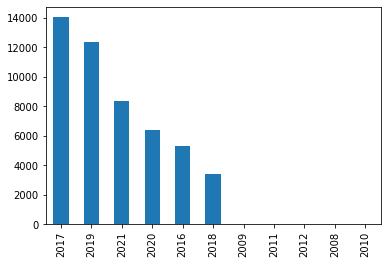

In [145]:
# Number of samples per year
water_quality_df["Year"].value_counts().plot.bar()

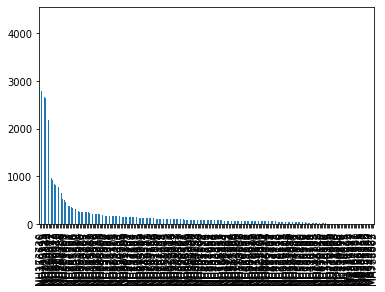

In [146]:
# Number of samples per beach
water_quality_df["Beach ID(Def.)"].value_counts().plot.bar()

### Bacteria Counts Summary

In [147]:
# Bacteria count summary
water_quality_df["ResultValue(Def.)"].describe()

count    35971.000000
mean        21.943407
std        114.845746
min          0.000000
25%          0.000000
50%          3.000000
75%         20.000000
max       6131.000000
Name: ResultValue(Def.), dtype: float64

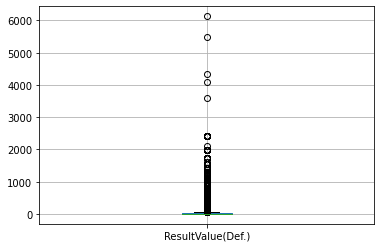

In [148]:
# Boxplot the bacteria count column
water_quality_df.boxplot(column="ResultValue(Def.)")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f33ee6ff210>]],
      dtype=object)

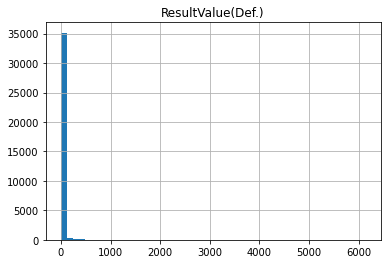

In [149]:
# histogram of the bacteria counts. Many samples have very low counts of bacteria. But a few have very high counts of bacteria
water_quality_df.hist(column="ResultValue(Def.)",bins=50)

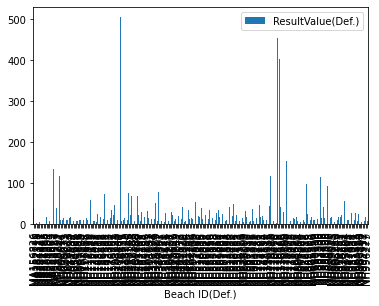

In [150]:
# Average bacteria counts per beach
bacteria_beach_df = water_quality_df.groupby(by="Beach ID(Def.)").mean()
bacteria_beach_df.plot.bar(y="ResultValue(Def.)")

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


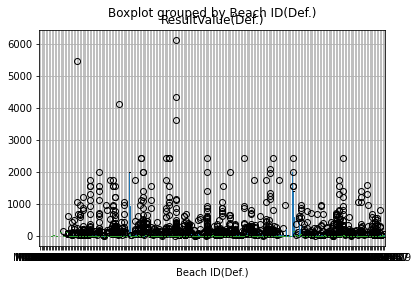

In [151]:
# boxplot of bacteria counts by beach
water_quality_df.boxplot(column="ResultValue(Def.)",by="Beach ID(Def.)")

In [152]:
# Average bacteria counts grouped by year
bacteria_year_df = water_quality_df.groupby(by="Year").mean()

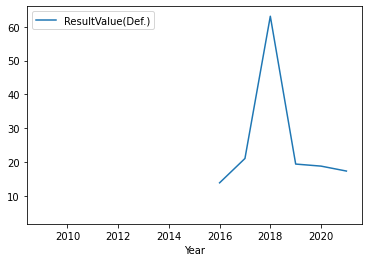

In [153]:
bacteria_year_df.plot(y="ResultValue(Def.)")

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


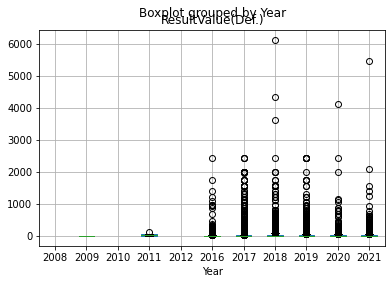

In [154]:
# bactera count box plots by year
water_quality_df.boxplot(column="ResultValue(Def.)",by="Year")

### Converting necessary Datatypes 

In [155]:
# Convert the column 'StartDate(Def.)' from object to datetime.
water_quality_df['Date'] = pd.to_datetime(water_quality_df['StartDate(Def.)'])

# Shift column "Date" to first position
first_column = water_quality_df.pop('Date')
  
# Insert column using insert(position,column_name,first_column) function
water_quality_df.insert(0, 'Date', first_column)

# Drop the old column "StartDate(Def.)", which is now replaced by the column "Date".
water_quality_df = water_quality_df.drop(columns=['StartDate(Def.)'])


# Convert the column 'AnalysisDateTime(Def.)' from object to datetime.
water_quality_df['Analysis_Date'] = pd.to_datetime(water_quality_df['AnalysisDateTime(Def.)'])

# Drop the old column 'AnalysisDateTime(Def.)', which is now replaced by the column 'Analysis_Date'.
water_quality_df = water_quality_df.drop(columns=['AnalysisDateTime(Def.)'])

water_quality_df

,Date,State Code,Year,Beach ID(Def.),Beach Name(Def.),StationID(Def.),Station Name (Def.),CountyName(Def.),Identifier(Def.),StartTime(Def.),ZoneCode(Def.),ActivityTypeCode(Def.),CharacteristicName(Def.),Result ValueText(Def.),ResultValue(Def.),ResultMeasureUnit,Result Comment(Def.),ResultAnalyticalMethodIdentifier Context(Def.),ResultAnalyticalMethodIdentifier(Def.),ResultAnalyticalMethodName(Def.),Sample CollectionMethod Identifier(Def.),Sample Collection Method Name(Def.),Field Gear(Def.),DetectionQuantitationLimit(Def.),Analysis_Date
0,2012-07-25,MA,2012,MA788803,Hideaway Village Association,MA788803,Hideaway Village Association,BARNSTABLE,MA7888032072012,10:05:00 AM,EDT,Sample-Routine,Enterococcus,NaN,NaN,cfu/100ml,NaN,NaN,NaN,NaN,ROUTINE,Routine Sample,Water Bottle,-,NaT
1,2012-06-06,MA,2012,MA851889,Tabor Park South,MA851889,Tabor Park South,BRISTOL,MA8518891582012,11:29:00 AM,EDT,Sample-Routine,Enterococcus,NaN,NaN,cfu/100ml,NaN,NaN,NaN,NaN,ROUTINE,Routine Sample,Water Bottle,-,NaT
2,2012-07-31,MA,2012,MA284631,Plum Island - end of island 2,MA284631,Plum Island,ESSEX,MA2846312132012,11:20:00 AM,EDT,Sample-Routine,Enterococcus,NaN,NaN,cfu/100ml,NaN,NaN,NaN,NaN,ROUTINE,Routine Sample,Water Bottle,-,NaT
3,2011-06-22,MA,2011,MA862437,Rock Harbor,MA862437,Rock Harbor,BARNSTABLE,MA8624371732011,07:05:00 AM,EDT,Sample-Routine,Enterococcus,NaN,134.0,cfu/100ml,NaN,NaN,NaN,NaN,ROUTINE,Routine Sample,Water Bottle,-,NaT
4,2011-08-09,MA,2011,MA585360,Sea Street (East Dennis),MA585360,Sea Street (East Dennis),BARNSTABLE,MA5853602212011,08:23:00 AM,EDT,Sample-Routine,Enterococcus,NaN,18.0,cfu/100ml,NaN,NaN,NaN,NaN,ROUTINE,Routine Sample,Water Bottle,-,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2016-07-05,NH,2016,NH233349,SUNAPEE LAKE DEWEY TB,BCHDEWSUNLF,LAKE SUNAPEE DEWEY TB-LEFT,SULLIVAN,B605103001,11:21:00 AM,EDT,Sample-Routine,Escherichia coli,NaN,2.0,MPN/100ml,NaN,APHA,9223-B,9223 B ~ Enzyme substrate assay for measuring ...,BEACHTRIP,BEACH PROGRAM SAMPLING PROCEDURES,Water Bottle,-,2016-07-06
49996,2016-07-05,NH,2016,NH233349,SUNAPEE LAKE DEWEY TB,BCHDEWSUNLF,LAKE SUNAPEE DEWEY TB-LEFT,SULLIVAN,B605103001,11:21:00 AM,EDT,Sample-Routine,"Temperature, water",NaN,23.3,deg C,NaN,APHA,2550,Temperature of Water by Thermometer,BEACHTRIP,BEACH PROGRAM SAMPLING PROCEDURES,Water Bottle,-,NaT
49997,2016-07-05,NH,2016,NH233349,SUNAPEE LAKE DEWEY TB,BCHDEWSUNLF,LAKE SUNAPEE DEWEY TB-LEFT,SULLIVAN,B605103001,11:21:00 AM,EDT,Sample-Routine,General observation (text),NaN,0.0,count,NaN,11113300,NONE,NO ANALYTICAL METHOD. NOT APPLICABLE.,BEACHTRIP,BEACH PROGRAM SAMPLING PROCEDURES,Water Bottle,-,NaT
49998,2016-07-05,NH,2016,NH233349,SUNAPEE LAKE DEWEY TB,BCHDEWSUNLF,LAKE SUNAPEE DEWEY TB-LEFT,SULLIVAN,B605103001,11:21:00 AM,EDT,Sample-Routine,General observation (text),NaN,0.0,count,NaN,11113300,NONE,NO ANALYTICAL METHOD. NOT APPLICABLE.,BEACHTRIP,BEACH PROGRAM SAMPLING PROCEDURES,Water Bottle,-,NaT


### Renaming Columns to match database schema.

In [ ]:

#df.rename(columns={"A": "a", "B": "c"})